In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from smodels.decomposition.theorySMS import TheorySMS
from smodels.experiment.expSMS import ExpSMS
from smodels.share.models.mssm import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.experiment.defaultFinalStates import finalStates
from smodels.base.model import Model
from collections import OrderedDict
from smodels.base.physicsUnits import fb, GeV
from itertools import product
from smodels.experiment.databaseObj import Database
from smodels.experiment.expResultObj import ExpResult
import copy
import re
from smodels.base.smodelsLogging import logger
import plotly.graph_objects as go
import networkx as nx
import numpy as np
logger.setLevel('ERROR')

In [3]:
db = Database('../unittests/database')
db.selectExpResults(analysisIDs='CMS-SUS-16-039',dataTypes='upperLimit',txnames='TChiChipmSlepL')

In [5]:
exp = db.expResultList[0]

TChiChipmSlepL


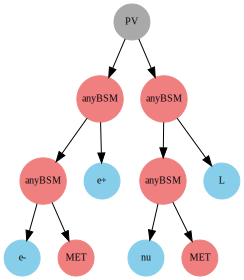

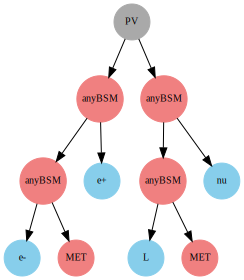

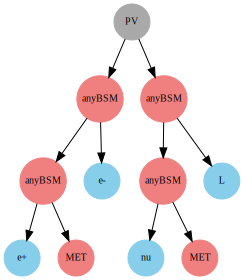

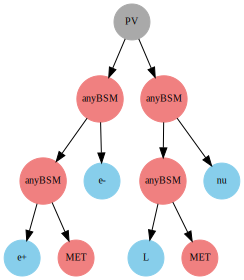

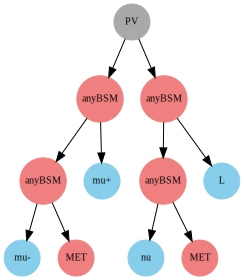

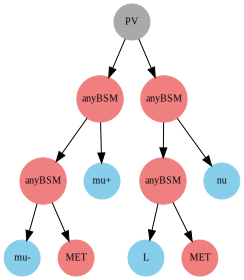

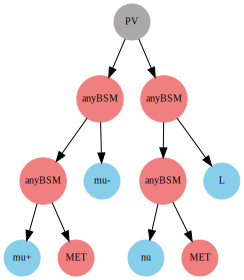

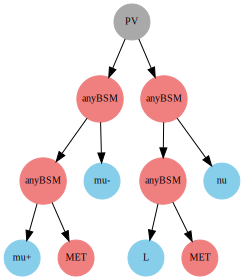

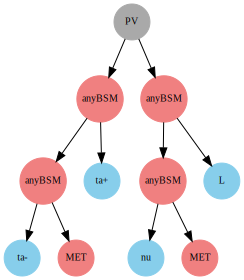

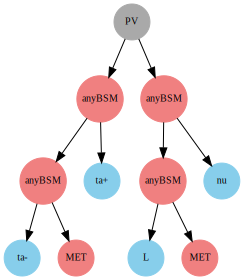

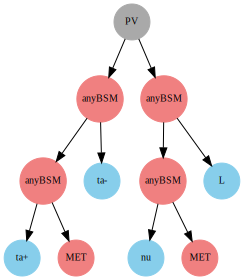

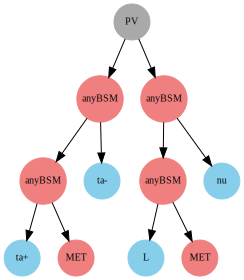

In [7]:
for tx in exp.getTxNames():
    print(tx)
    for sms in tx.smsMap:
        sms.draw()
        newSMS = sms.copy()

In [ ]:
smsDict = db.expSMSMap.smsDict

In [ ]:
cNameDict = {}
for isms, sms in smsDict.items():
    cName = sms.canonName
    if cName in cNameDict:
        cNameDict[cName].append(isms)
    else:
        cNameDict[cName] = [isms]



In [ ]:
for cName,smsList in cNameDict.items():
    print(cName,len(smsList))
    continue
    if str(cName) == '*':
        print('\n\n',cName)
        for isms in smsList:
            print(smsDict[isms])
    if any('HSCP' in str(smsDict[isms]) for isms in smsList):
        print('\n\n',cName, 'has HSCP')
        for isms in smsList:
            if 'HSCP' in str(smsDict[isms]):
                print(smsDict[isms])

In [ ]:
cName = 111010100110101000
for c in cNameDict:
    if c == cName:
        print(c,'=',cName)

In [ ]:
tx = db.expResultList[7].getTxNames()[3]

In [ ]:
print(tx)

In [ ]:
dd = {tx : 10}

In [ ]:
hash(tx)

In [ ]:
for iexp,exp in enumerate(db.expResultList):
    # if len(exp.datasets) > 10:
        # print(iexp,exp)
        # break
    for itx,tx in enumerate(exp.getTxNames()):
        if tx in dd:
            print(tx,itx,iexp,exp)

In [ ]:
x = {3 : '2', 5 : '7'}
x.update({5 : 10})
print(x)

In [ ]:
db = Database('/home/lessa/smodels-utils/bin/official300-beta.pcl')
print(db)

In [ ]:
superseded = []
for exp in sorted(db.expResultList, key = lambda exp: exp.globalInfo.id):
     if hasattr(exp.globalInfo, "supersededBy" ):
        superseded.append(exp)
print(len(superseded))

In [ ]:
db.selectExpResults(analysisIDs=['ATLAS-CONF-2013-024'])

In [ ]:
print(db)

In [ ]:
for exp in db.expResultList:
    print(exp)
    print(exp.globalInfo.__dict__)

In [ ]:
class Test(object):


    def __init__(self):
        self._allExpResult = []
        self._activeResults = []
    
    @property
    def expResultList(self):
        return self._activeResults[:]

    @expResultList.setter
    def expResultList(self,value):
        self._allExpResult = value
        self._activeResults = self._allExpResult[:]

    def filterResults(self,key):
        filtered = [r for r in self._allExpResult  if key in str(r)]
        self._activeResults = filtered[:]

    

In [ ]:
x = Test()

In [ ]:
allres = [1,2,3,4,5,6]
x.expResultList = allres

In [ ]:
print(x.expResultList)

In [ ]:
x.filter('5')